<a href="https://colab.research.google.com/github/blipbloping/Manga-Sales-Prediction/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("best-selling-manga.csv").drop_duplicates()
df.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


In [8]:
df.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


In [10]:
duplicates = df.duplicated().sum()
print(duplicates)
#checking duplicates

0


In [11]:
missing_values = df.isnull().sum()
total_missing_values = (missing_values).sum()
total_cells = np.product(df.shape)
percent_missing_values = (total_missing_values / total_cells)*100
print("Percent of data that is missing", percent_missing_values)
print(missing_values)

Percent of data that is missing 0.0
Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64


In [12]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")
#checking unique values

Manga series: 187 distinct values
Author(s): 164 distinct values
Publisher: 21 distinct values
Demographic: 9 distinct values
No. of collected volumes: 83 distinct values
Serialized: 154 distinct values
Approximate sales in million(s): 67 distinct values
Average sales per volume in million(s): 119 distinct values


In [13]:
# CORRELATION ANALYSIS

numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
No. of collected volumes,1.000000,0.385699,-0.300739
Approximate sales in million(s),0.385699,1.000000,0.523410
Average sales per volume in million(s),-0.300739,0.523410,1.000000


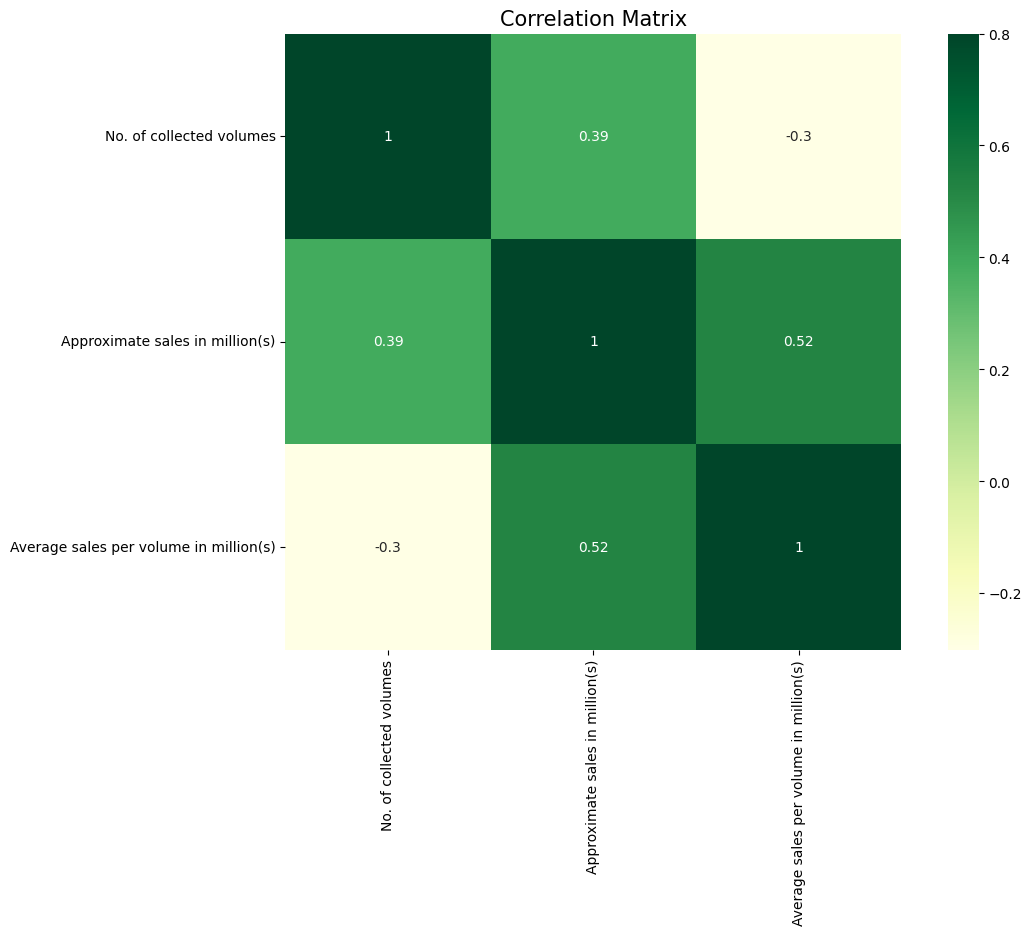

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(correlation_matrix, vmax =.8, square = True, annot = True,cmap='YlGn' )
plt.title('Correlation Matrix',fontsize=15);

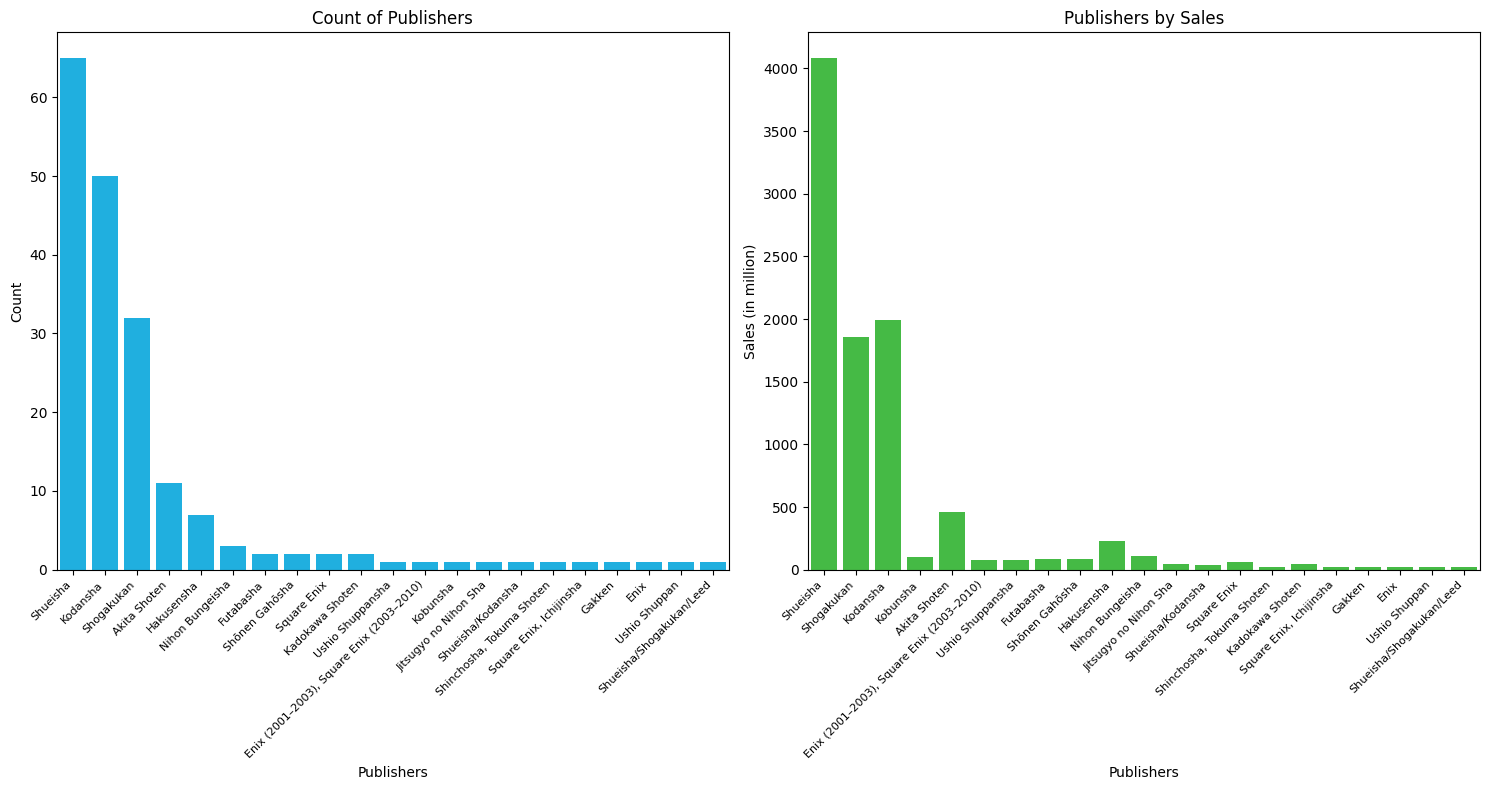

In [15]:
publisher_counts = df["Publisher"].value_counts()

# Plot count of publishers
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=publisher_counts.index, y=publisher_counts.values, color='deepskyblue')
plt.xlabel('Publishers')
plt.ylabel('Count')
plt.title('Count of Publishers')
plt.xticks(rotation=45, ha='right', fontsize=8)

# Plot publishers by sales
plt.subplot(1, 2, 2)
sns.barplot(x='Publisher', y='Approximate sales in million(s)', data=df, estimator=sum, errorbar=None, color='limegreen')
plt.xlabel('Publishers')
plt.ylabel('Sales (in million)')
plt.title('Publishers by Sales')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

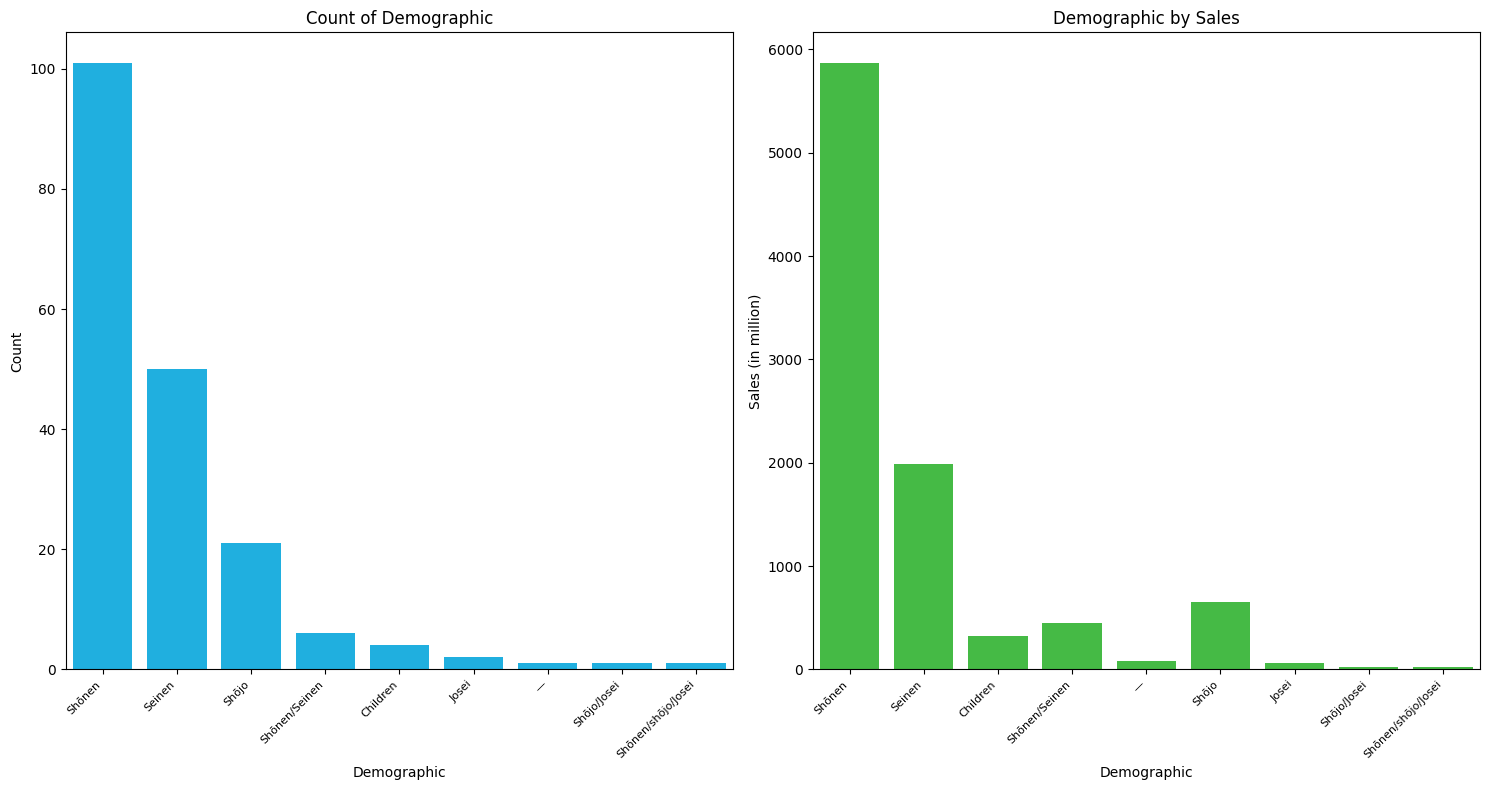

In [16]:
demographic_counts = df["Demographic"].value_counts()

# Plot count of publishers
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=demographic_counts.index, y=demographic_counts.values, color='deepskyblue')
plt.xlabel('Demographic')
plt.ylabel('Count')
plt.title('Count of Demographic')
plt.xticks(rotation=45, ha='right', fontsize=8)

# Plot publishers by sales
plt.subplot(1, 2, 2)
sns.barplot(x='Demographic', y='Approximate sales in million(s)', data=df, estimator=sum, errorbar=None, color='limegreen')
plt.xlabel('Demographic')
plt.ylabel('Sales (in million)')
plt.title('Demographic by Sales')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

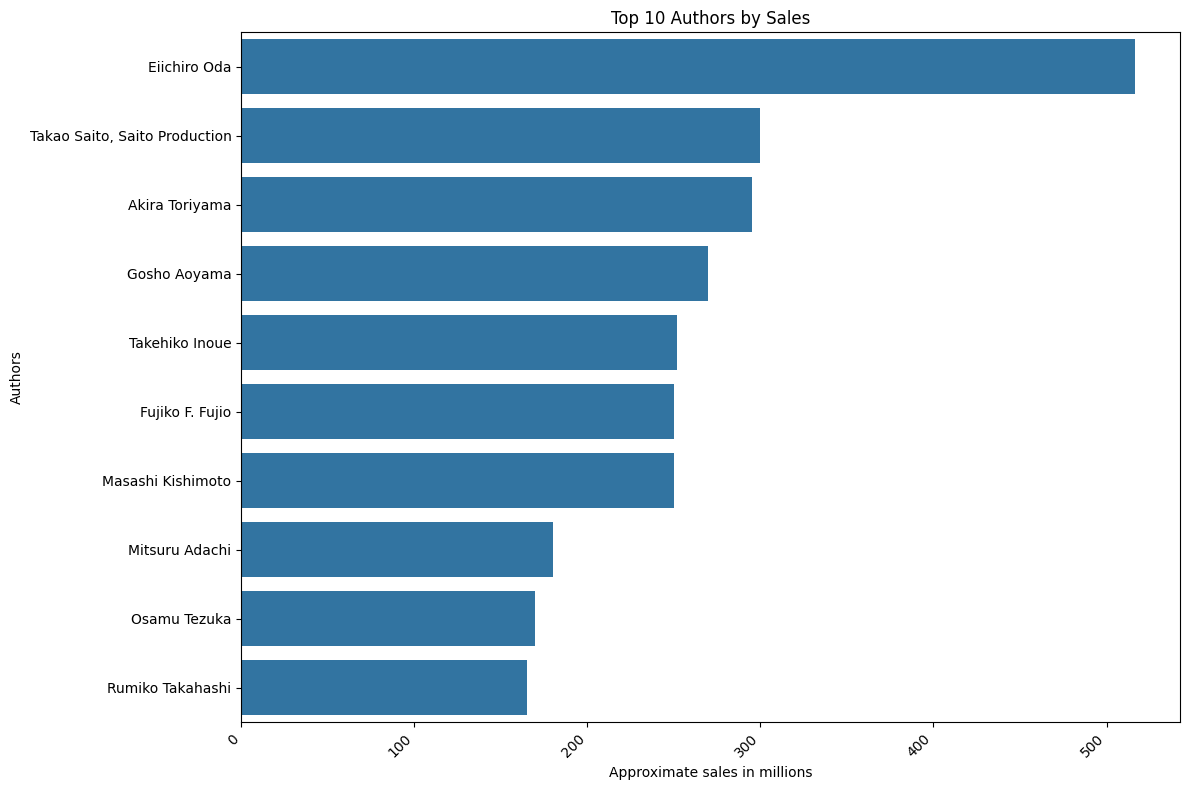

In [17]:
top_authors = df.groupby('Author(s)')['Approximate sales in million(s)'].sum().nlargest(10)

# Plotting the top 10 authors by sales
plt.figure(figsize=(12, 8))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.xlabel('Approximate sales in millions')
plt.ylabel('Authors')
plt.title('Top 10 Authors by Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

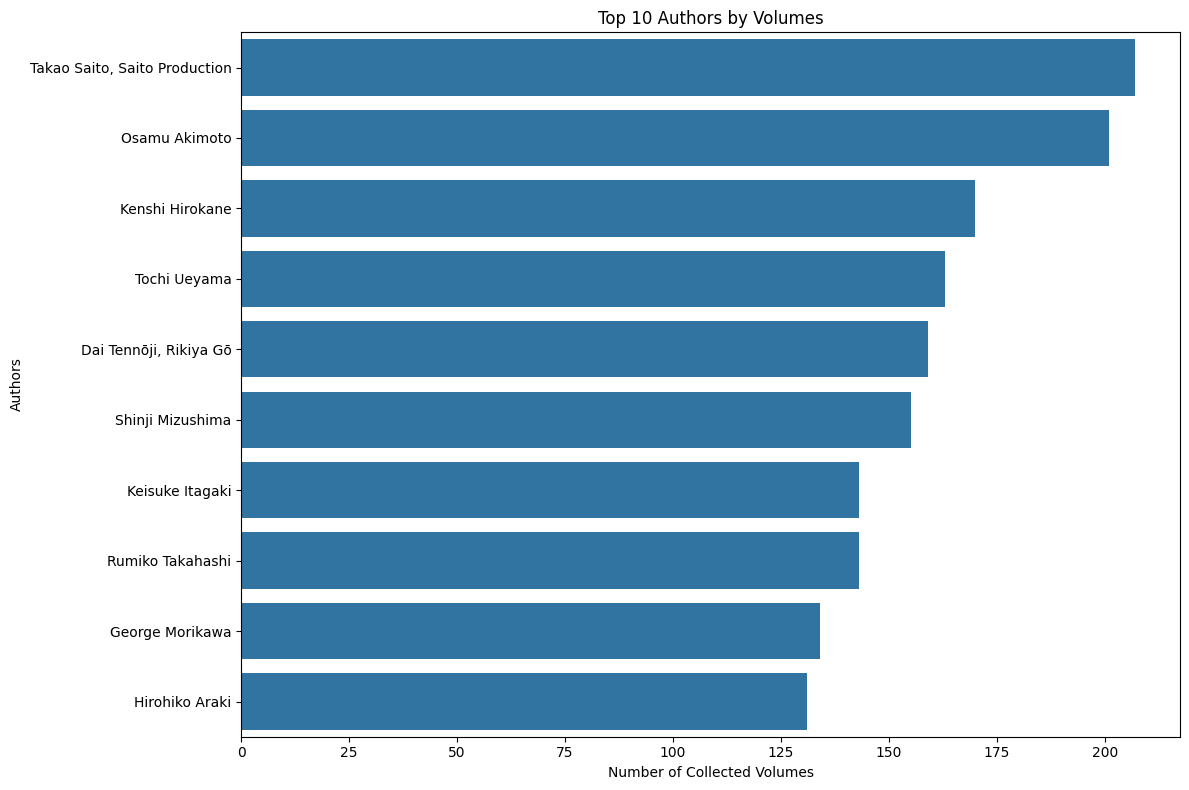

In [18]:
Authors_by_volume = df.groupby('Author(s)')["No. of collected volumes"].sum()
top_volume = Authors_by_volume.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_volume.values, y=top_volume.index)  # Transpose x and y
plt.xlabel('Number of Collected Volumes')
plt.ylabel('Authors')
plt.title('Top 10 Authors by Volumes')
plt.tight_layout()
plt.show()

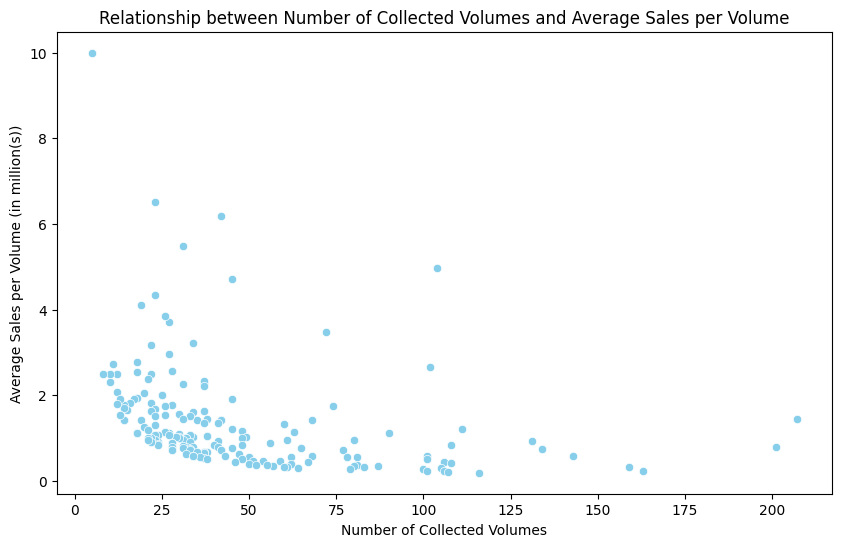

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No. of collected volumes', y='Average sales per volume in million(s)', data=df, color='skyblue')
plt.title('Relationship between Number of Collected Volumes and Average Sales per Volume')
plt.xlabel('Number of Collected Volumes')
plt.ylabel('Average Sales per Volume (in million(s))')
plt.show()

In [20]:
current_year = str(pd.Timestamp.now().year)

def serialized_to_date(df):
    for i, serial in enumerate(df['Serialized']):
        if '–' in serial:
            # Split the string by comma and handle each part separately
            serial_parts = [part.strip() for part in serial.split(',')]
            start, end = serial_parts[0].rsplit('–', maxsplit=1)
            end = end.replace('present', current_year).replace('(on hiatus)', '').strip()
            df.at[i, 'Serialized_start'] = start.strip()
            df.at[i, 'Serialized_end'] = end
    # Convert the 'Serialized_start' and 'Serialized_end' columns to datetime objects
    df['Serialized_start'] = pd.to_datetime(df['Serialized_start'], errors='coerce')
    df['Serialized_end'] = pd.to_datetime(df['Serialized_end'], errors='coerce')
    display(df.head())

serialized_to_date(df)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Serialized_start,Serialized_end
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97,1997-01-01,2024-01-01
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45,1968-01-01,2024-01-01
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65,1994-01-01,2024-01-01
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19,1984-01-01,1995-01-01
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71,1969-01-01,1996-01-01


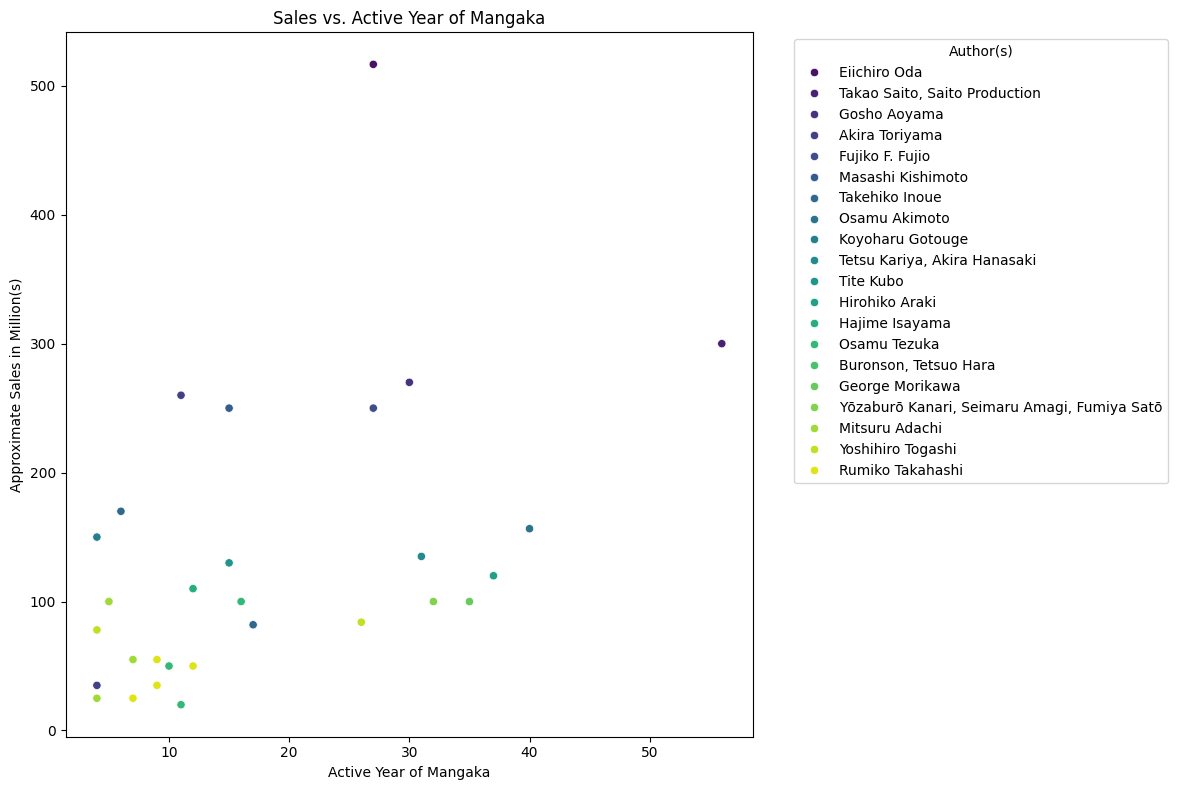

In [21]:
# Drop rows with missing values in 'Serialized_start' and 'Serialized_end'
valid_rows = df.dropna(subset=['Serialized_start', 'Serialized_end'])

# Create a new column for the active year of the mangaka
valid_rows['Active_Year'] = valid_rows['Serialized_end'].dt.year - valid_rows['Serialized_start'].dt.year

# Select top N authors based on sales
top_authors = valid_rows.groupby('Author(s)')['Approximate sales in million(s)'].sum().nlargest(20).index
valid_rows = valid_rows[valid_rows['Author(s)'].isin(top_authors)]


plt.figure(figsize=(12, 8))
sns.scatterplot(data=valid_rows, x='Active_Year', y='Approximate sales in million(s)', hue='Author(s)', palette='viridis')
plt.xlabel('Active Year of Mangaka')
plt.ylabel('Approximate Sales in Million(s)')
plt.title('Sales vs. Active Year of Mangaka')
plt.legend(title='Author(s)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()